**Step 1**: Importing libraries and Exploring the Dataset.

**Step 2**: Definining Exploratory Data Analysis with an overview of the whole project .

**Step 3**: Checking missing values , Outliers & duplicates

**Step 4**: Creating visual methods to analyze the data.

**Step 5**: Making Data Preprossing & Cleaning

**Step 6**: creat a model that fits the data

##Step 1: Importing libraries and Exploring the Dataset

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd

#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split

#Feature Scaling
from sklearn.preprocessing import StandardScaler

#For Fitting
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

%matplotlib inline
#ignore any warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/IRIS.csv")

In [3]:
df.shape

(150, 5)

##Step 2: Definining Exploratory Data Analysis with an overview of the whole project

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##Step 3: Checking missing values , Outliers & duplicates

In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.duplicated().sum() #so we need to drop it

3

In [10]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [12]:
# check outliers
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    #df.drop(index_label, inplace=True) ------->we will drop it in cleaning step , here we check only

Number of outliers in sepal_length: 0
Number of outliers in sepal_width: 4
Number of outliers in petal_length: 0
Number of outliers in petal_width: 0


##Step 4: Making Data Preprossing & Cleaning

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
##encode species columns into categories
df['species'] = df['species'].map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}).astype(int)

##Step 5: Creating visual methods to analyze the data

<Axes: >

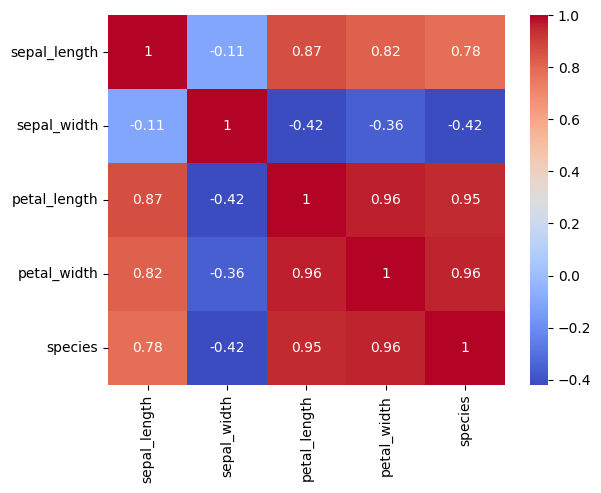

In [15]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True) #strong relatiion between columns

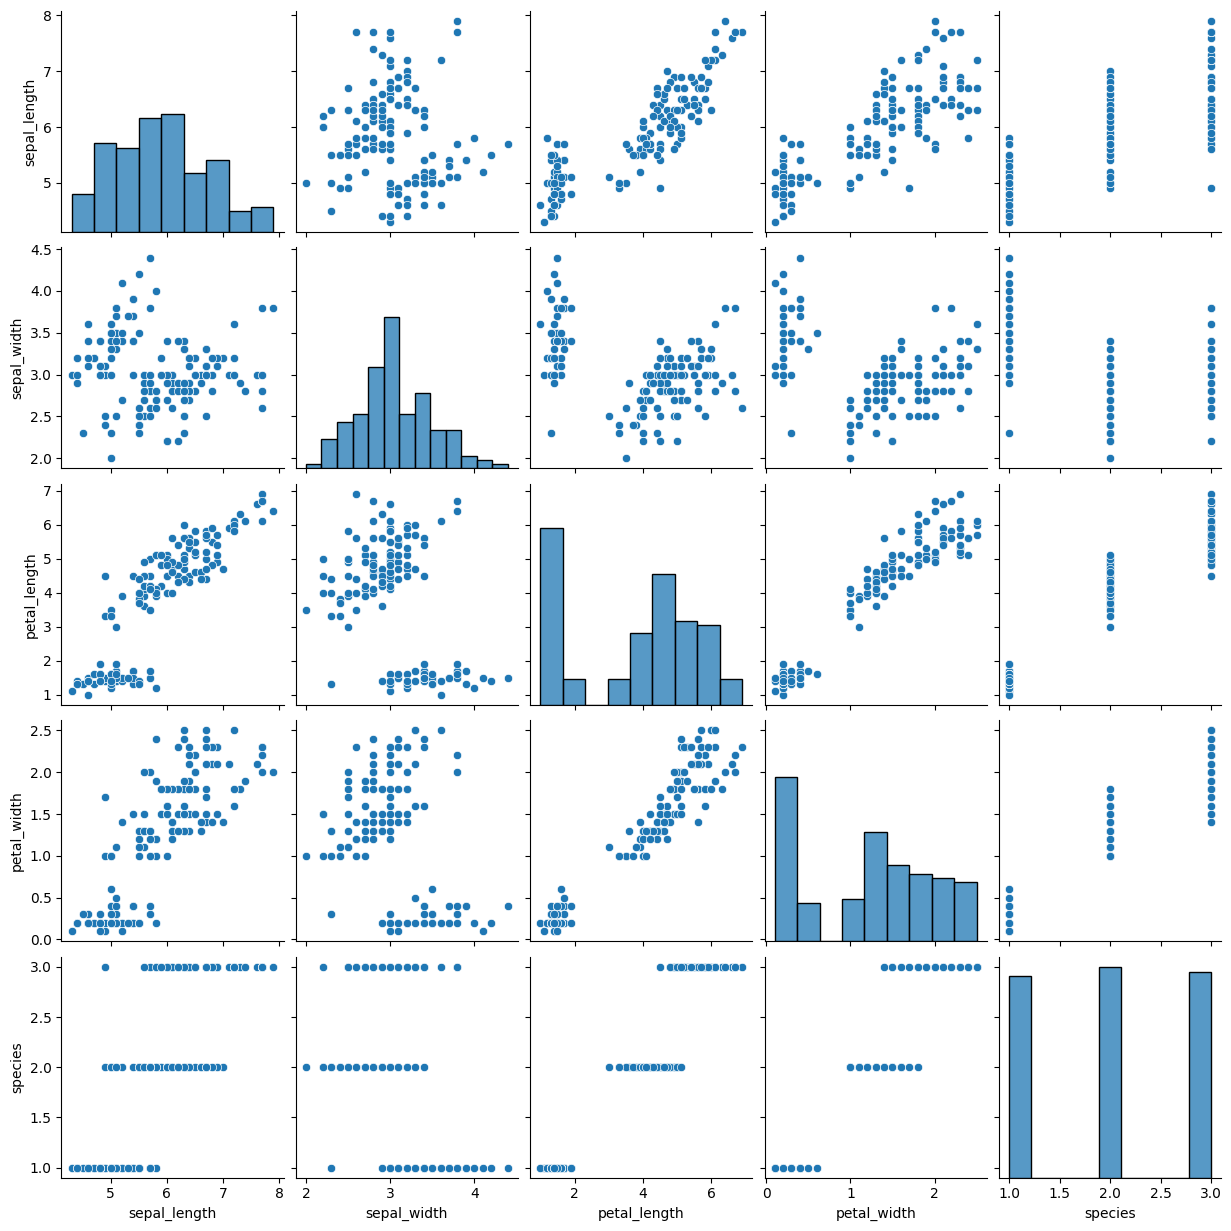

In [16]:
sns.pairplot(df)

<Axes: xlabel='petal_length', ylabel='Density'>

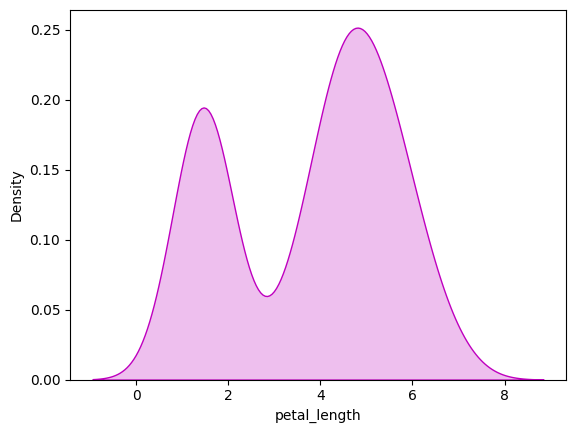

In [17]:
sns.kdeplot(df['petal_length'], shade=True, color='m')

<Axes: xlabel='petal_width', ylabel='Density'>

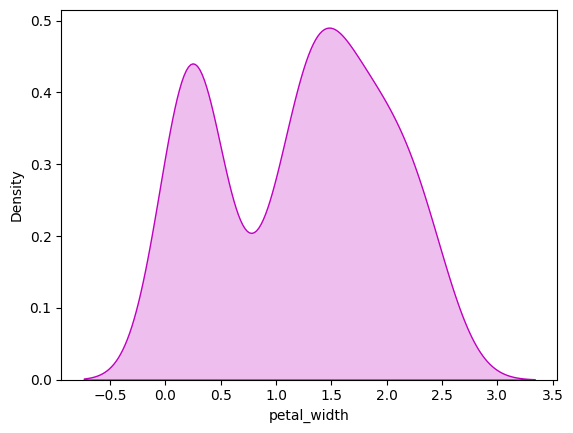

In [18]:
sns.kdeplot(df['petal_width'], shade=True, color='m')

<Axes: xlabel='sepal_length', ylabel='Density'>

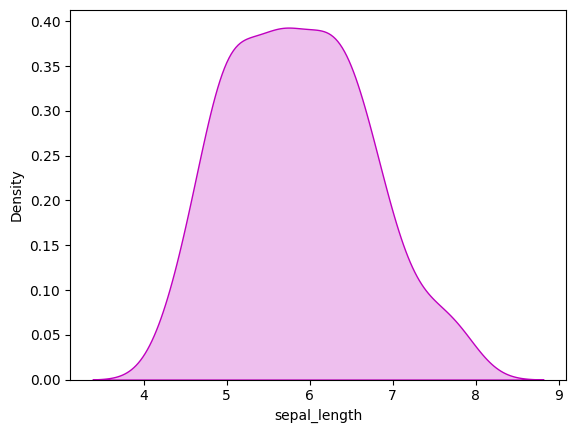

In [19]:
sns.kdeplot(df['sepal_length'], shade=True, color='m')

<Axes: xlabel='sepal_width', ylabel='Density'>

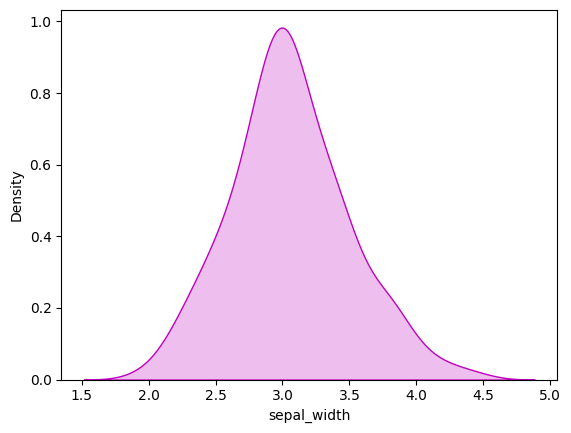

In [20]:
sns.kdeplot(df['sepal_width'], shade=True, color='m')

<Axes: xlabel='species', ylabel='Density'>

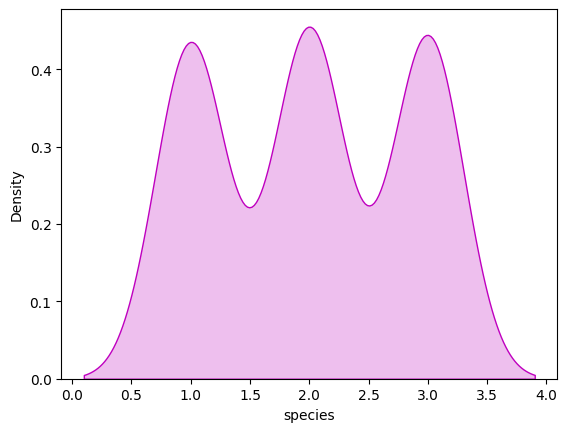

In [21]:
sns.kdeplot(df['species'], shade=True, color='m')

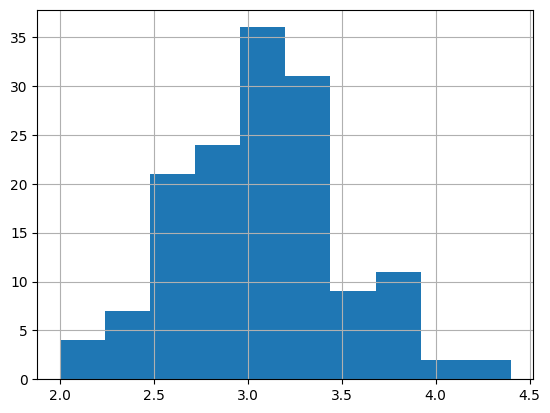

In [22]:
df['sepal_width'].hist()
plt.show()

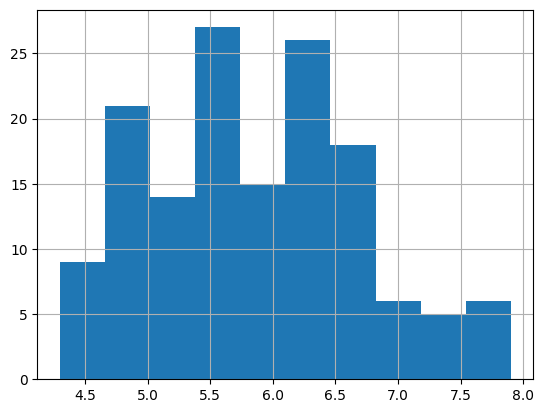

In [23]:
df['sepal_length'].hist()
plt.show()

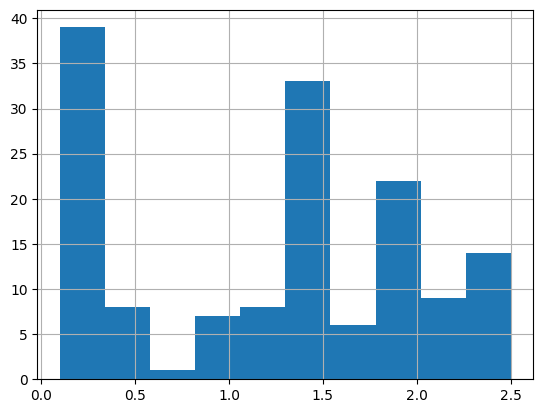

In [24]:
df['petal_width'].hist()
plt.show()

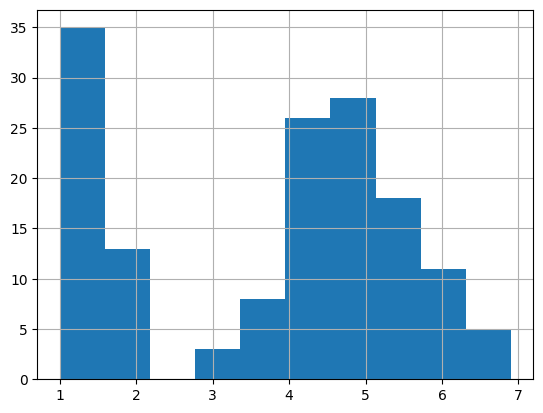

In [25]:
df['petal_length'].hist()
plt.show()

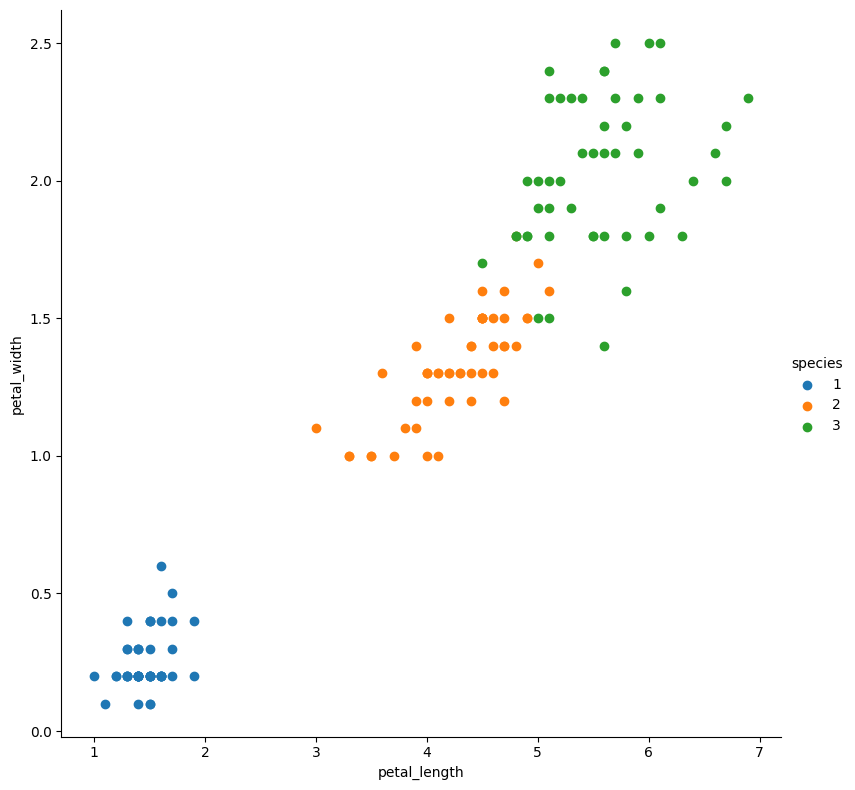

In [26]:
s = sns.FacetGrid(df, height=8, hue="species")
s.map(plt.scatter, "petal_length", "petal_width")
s.add_legend()
sns.set_style("whitegrid")
plt.show()

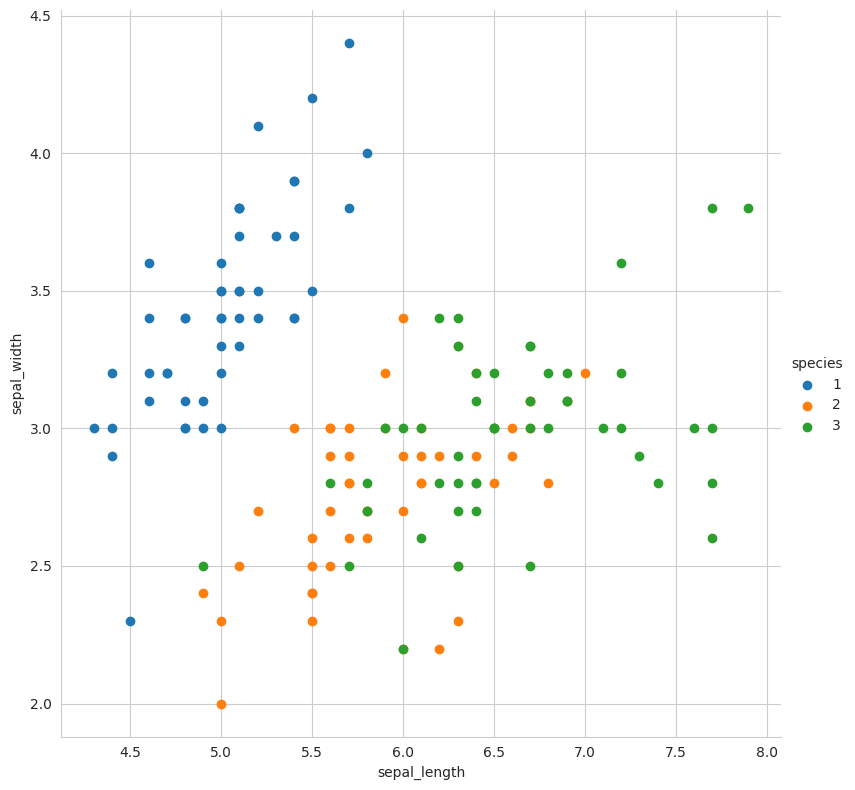

In [28]:
s = sns.FacetGrid(df, height=8, hue="species")
s.map(plt.scatter, "sepal_length", "sepal_width")
s.add_legend()
sns.set_style("whitegrid")
plt.show()

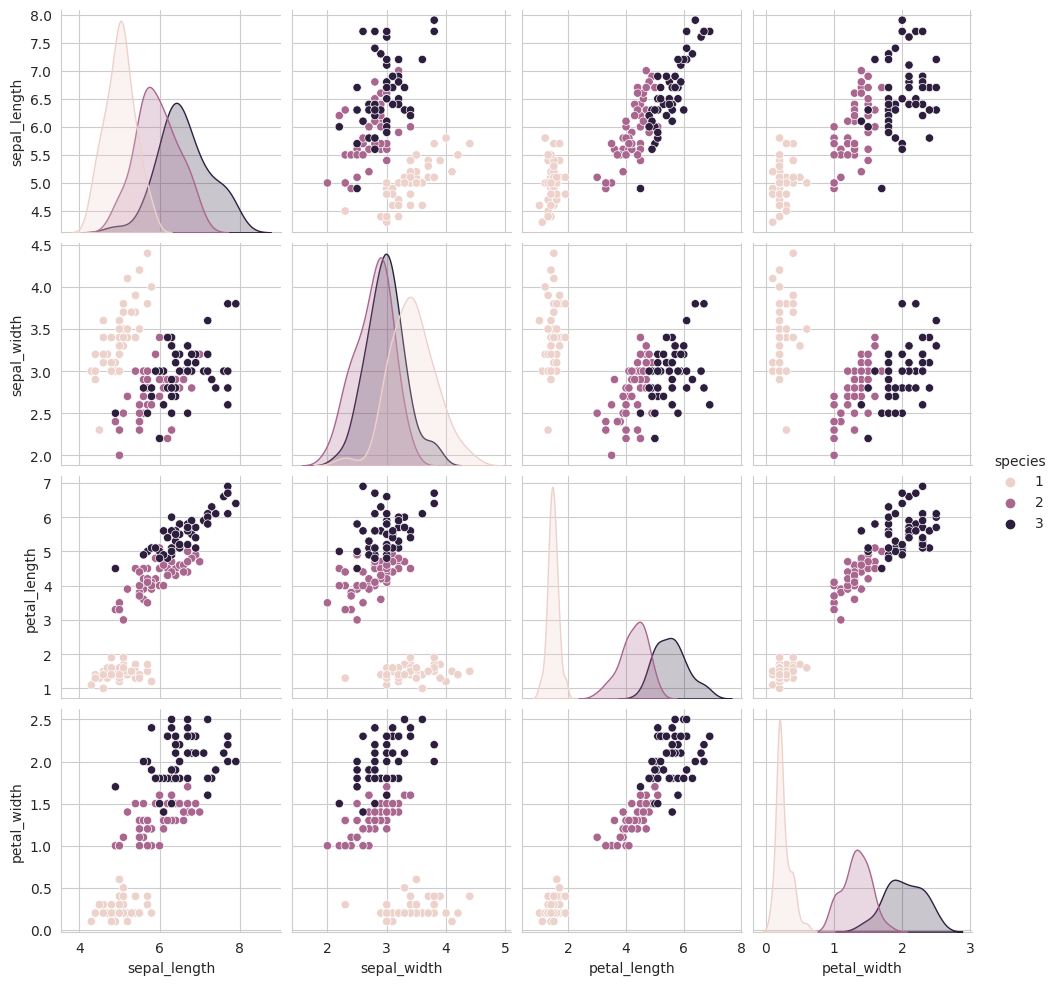

In [29]:
sns.pairplot(df, height=2.5, hue="species")
plt.show()

##Step 6: creat a model that fits the data

In [30]:
X=df.drop(columns=['species'])
Y=df['species']

In [31]:
#Splitting data into train & test
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 12)

##KNN Model

In [32]:
kn= KNeighborsRegressor()
kn.fit(x_train,y_train)
y_pred_kn = kn.predict(x_test)
print('Accuracy:',r2_score(y_test,y_pred_kn))

Accuracy: 0.9781818181818182


##Logistic Regression Model

In [33]:
# Fitting Logistic Regression to the Training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# Predicting the Test set results
y_pred_lr= lr.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lr)
cm
cr=classification_report(y_test, y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##Random Forest Model

In [34]:
model_rf=RandomForestClassifier(random_state=1, n_estimators=10)
model_rf.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
#accurecy table
cr=classification_report(y_test, y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



*conclusion:*

Accuracy from all models is 100%